# 09.01 - Introducción a Scikit-Learn

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 45 min

---

## ¿Qué aprenderemos?

- Qué es Scikit-Learn y su API de estimadores
- El flujo de trabajo básico en Machine Learning
- Preprocesamiento de datos (Escalado y Codificación)
- División de datos en entrenamiento (train) y prueba (test)
- Entrenamiento de un primer modelo básico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

scikit-learn version: 1.6.1


---

## 1. El flujo de trabajo de Scikit-Learn

Scikit-Learn utiliza una API consistente basada en objetos llamados **Estimadores**. El proceso suele seguir estos pasos:

1. **Seleccionar** la clase del modelo.
2. **Instanciar** el modelo con hiperparámetros.
3. **Organizar** los datos en matriz de características `X` y vector objetivo `y`.
4. **Ajustar** el modelo a los datos con `.fit()`.
5. **Predecir** sobre nuevos datos con `.predict()`.

---

## 2. Preparación de los datos

Para este ejemplo utilizaremos el dataset `diamonds` incluido en Seaborn, donde intentaremos predecir el **precio** de un diamante basándonos en sus características.

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Preprocesamiento: Variables Categóricas

Los modelos de Scikit-Learn solo entienden números. Necesitamos convertir variables como `cut`, `color` o `clarity`.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Simplificamos el ejemplo codificando las columnas categóricas
le = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    df[col] = le.fit_transform(df[col])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


---

## 3. División Train-Test

Nunca debemos evaluar el modelo con los mismos datos que usamos para entrenar.

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Muestras totales: {len(df)}")
print(f"Muestras entrenamiento: {len(X_train)}")
print(f"Muestras prueba: {len(X_test)}")

Muestras totales: 53940
Muestras entrenamiento: 43152
Muestras prueba: 10788


---

## 4. Entrenamiento del modelo

Usaremos un modelo de regresión básico para predecir el precio.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Instanciar
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Ajustar (este paso puede tardar unos segundos)
model.fit(X_train, y_train)

# 3. Predecir
y_pred = model.predict(X_test)

---

## 5. Evaluación

Visualicemos qué tan cerca están nuestras predicciones de la realidad.

R2 Score: 0.9815
MAE: 267.98$


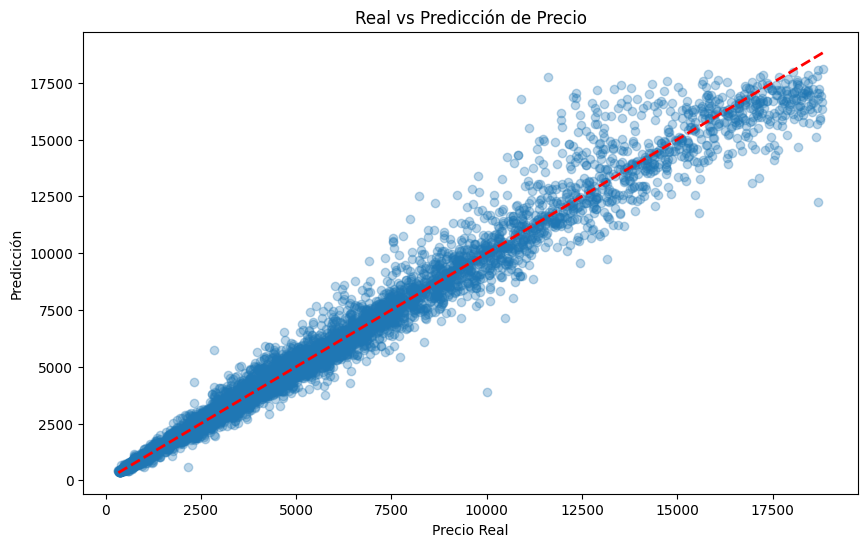

In [6]:
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}$")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Predicción')
plt.title('Real vs Predicción de Precio')
plt.show()

---

**Anterior:** [08.03 - Folium Maps](../08_geospatial/08_03_folium_maps.ipynb)  
**Siguiente:** [09.02 - Regresion](./09_02_regression.ipynb)